# IoT and Sensor Data 

Group 6 - Batch 5

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [2]:
data=pd.read_csv('iot_telemetry_data.csv')

In [3]:
data.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,Data Stream ID,Resource ID,Measurement ID,Record ID
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,33313,65523,2.519093e+18,333132519093122000000000.00
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,33313,65523,2.519093e+18,333132519093122000000000.00
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,33313,65523,2.519093e+18,333132519093123000000000.00
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,33313,65523,2.519093e+18,333132519093123000000000.00
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,33313,65523,2.519093e+18,333132519093124000000000.00


In [4]:
data.shape

(405184, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ts              405184 non-null  float64
 1   device          405184 non-null  object 
 2   co              405184 non-null  float64
 3   humidity        405184 non-null  float64
 4   light           405184 non-null  bool   
 5   lpg             405184 non-null  float64
 6   motion          405184 non-null  bool   
 7   smoke           405184 non-null  float64
 8   temp            405184 non-null  float64
 9   Data Stream ID  405184 non-null  int64  
 10  Resource ID     405184 non-null  int64  
 11  Measurement ID  405184 non-null  float64
 12  Record ID       405184 non-null  object 
dtypes: bool(2), float64(7), int64(2), object(2)
memory usage: 34.8+ MB


In [6]:
data.describe()

,ts,co,humidity,lpg,smoke,temp,Data Stream ID,Resource ID,Measurement ID
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000,4.051840e+05
mean,1.594858e+09,0.004639,60.511694,0.007237,0.019264,22.453987,36802.691227,70294.977990,2.519070e+18
std,1.994984e+05,0.001250,11.366489,0.001444,0.004086,2.698347,2887.173172,3948.058162,4.235914e+13
min,1.594512e+09,0.001171,1.100000,0.002693,0.006692,0.000000,33313.000000,65523.000000,2.518832e+18
25%,1.594686e+09,0.003919,51.000000,0.006456,0.017024,19.900000,33313.000000,65523.000000,2.519051e+18
50%,1.594858e+09,0.004812,54.900000,0.007489,0.019950,22.200000,39184.000000,73554.000000,2.519079e+18
75%,1.595031e+09,0.005409,74.300003,0.008150,0.021838,23.600000,39184.000000,73554.000000,2.519100e+18
max,1.595203e+09,0.014420,99.900002,0.016567,0.046590,30.600000,39205.000000,73575.000000,2.519129e+18


In [7]:
data.isnull().sum()

ts                0
device            0
co                0
humidity          0
light             0
lpg               0
motion            0
smoke             0
temp              0
Data Stream ID    0
Resource ID       0
Measurement ID    0
Record ID         0
dtype: int64

No null values

# Data Preprocessing

### 1. Missing Values Handling
There is no missing values present in the Data

### 2. outlier Detection and Handling

Text(0.5, 1.0, 'CO')

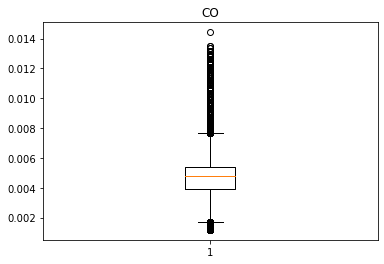

In [8]:
#boxplot of co
plt.boxplot(data['co'])
plt.title('CO')

In [9]:
# calculating 1st, 2nd and 3rd quartiles
Q1=np.percentile(data['co'], 25, interpolation='midpoint')
Q2=np.percentile(data['co'], 50, interpolation='midpoint')
Q3=np.percentile(data['co'], 75, interpolation='midpoint')
print ("Q1 :", Q1)
print ("Q2 :", Q2)
print ("Q3 :", Q3)

# calculating Lower and Upper limit
IQR= Q3-Q1
Low_lim= Q1-(1.5*IQR)
Up_lim= Q3+(1.5*IQR)
print("Inter Quartile Range : ",IQR)
print("Lower Limit : ",Low_lim)
print("Upper Limit : ",Up_lim)

Q1 : 0.003918682
Q2 : 0.004811521500000001
Q3 : 0.005408832
Inter Quartile Range :  0.00149015
Lower Limit :  0.0016834569999999997
Upper Limit :  0.007644056999999999


In [10]:
outlier_list = []
for x in data['co']:
        if((x>Up_lim) or (x<Low_lim)):
            outlier_list.append(x)
print('Outliers = \n', outlier_list)

Outliers = 
 [0.007847537, 0.007847537, 0.007681159, 0.007847537, 0.007847537, 0.007681159, 0.007681159, 0.007681159, 0.007681159, 0.007847537, 0.007847537, 0.007847537, 0.007847537, 0.007847537, 0.007847537, 0.007847537, 0.007847537, 0.007681159, 0.007847537, 0.007847537, 0.007847537, 0.007847537, 0.007961624, 0.007847537, 0.007847537, 0.007847537, 0.007847537, 0.008077618, 0.007847537, 0.008437411, 0.007961624, 0.007961624, 0.007847537, 0.007847537, 0.008195556, 0.008315474, 0.007961624, 0.007847537, 0.007847537, 0.007961624, 0.008195556, 0.008077618, 0.008077618, 0.008195556, 0.008077618, 0.008315474, 0.008315474, 0.008315474, 0.008315474, 0.008315474, 0.008195556, 0.008315474, 0.008437411, 0.008437411, 0.008315474, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008437411, 0.008499384, 0.008468333, 0.008437411

In [11]:
out=pd.DataFrame(outlier_list)
out.shape

(10480, 1)

In [12]:
#finding index of outlier
index=data['co'][(data['co']>Up_lim)|(data['co']<Low_lim)].index

#dropping outlier
data.drop(index,inplace=True)

Text(0.5, 1.0, 'CO')

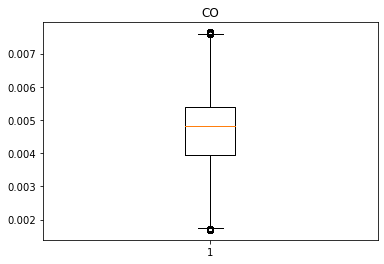

In [13]:
#boxplot of co
plt.boxplot(data['co'])
plt.title('CO')

outliers are removed from "co" column

Text(0.5, 1.0, 'Humidity')

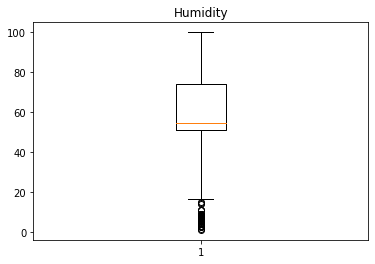

In [14]:
#boxplot of Humidity
plt.boxplot(data['humidity'])
plt.title('Humidity')

Outliers present in this column

In [15]:
# calculating 1st, 2nd and 3rd quartiles
Q1=np.percentile(data['humidity'], 25, interpolation='midpoint')
Q2=np.percentile(data['humidity'], 50, interpolation='midpoint')
Q3=np.percentile(data['humidity'], 75, interpolation='midpoint')
print ("Q1 :", Q1)
print ("Q2 :", Q2)
print ("Q3 :", Q3)

# calculating Lower and Upper limit
IQR= Q3-Q1
Low_lim= Q1-(1.5*IQR)
Up_lim= Q3+(1.5*IQR)
print("Inter Quartile Range : ",IQR)
print("Lower Limit : ",Low_lim)
print("Upper Limit : ",Up_lim)

Q1 : 51.0
Q2 : 54.40000153
Q3 : 74.09999847
Inter Quartile Range :  23.099998470000003
Lower Limit :  16.350002294999996
Upper Limit :  108.749996175


In [16]:
outlier_list1 = []
for x in data['humidity']:
        if((x>Up_lim) or (x<Low_lim)):
            outlier_list1.append(x)
            
out=pd.DataFrame(outlier_list1)
out.shape

(44, 1)

In [17]:
#finding index of outlier
index1=data['humidity'][(data['humidity']>Up_lim)|(data['humidity']<Low_lim)].index

#dropping outlier
data.drop(index1,inplace=True)

Text(0.5, 1.0, 'Humidity')

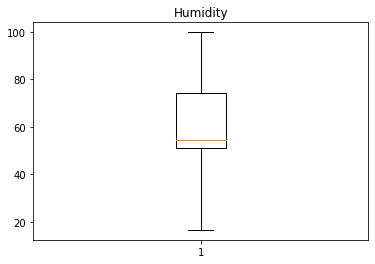

In [18]:
#boxplot of Humidity
plt.boxplot(data['humidity'])
plt.title('Humidity')

Now all outliers are removed

Text(0.5, 1.0, 'LPG')

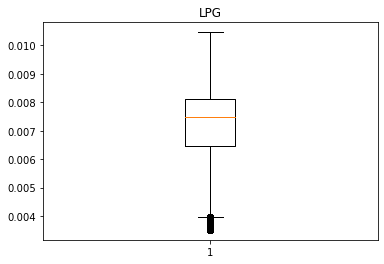

In [19]:
#boxplot of lpg
plt.boxplot(data['lpg'])
plt.title('LPG')

In [20]:
# calculating 1st, 2nd and 3rd quartiles
Q1=np.percentile(data['lpg'], 25, interpolation='midpoint')
Q2=np.percentile(data['lpg'], 50, interpolation='midpoint')
Q3=np.percentile(data['lpg'], 75, interpolation='midpoint')
print ("Q1 :", Q1)
print ("Q2 :", Q2)
print ("Q3 :", Q3)

# calculating Lower and Upper limit
IQR= Q3-Q1
Low_lim= Q1-(1.5*IQR)
Up_lim= Q3+(1.5*IQR)
print("Inter Quartile Range : ",IQR)
print("Lower Limit : ",Low_lim)
print("Upper Limit : ",Up_lim)

Q1 : 0.006469784
Q2 : 0.007496462
Q3 : 0.008132639
Inter Quartile Range :  0.0016628550000000004
Lower Limit :  0.003975501499999999
Upper Limit :  0.0106269215


In [21]:
outlier_list2 = []
for x in data['lpg']:
        if((x>Up_lim) or (x<Low_lim)):
            outlier_list2.append(x)
            
out=pd.DataFrame(outlier_list2)
out.shape

(3967, 1)

In [22]:
#finding index of outlier
index2=data['lpg'][(data['lpg']>Up_lim)|(data['lpg']<Low_lim)].index

#dropping outlier
data.drop(index2,inplace=True)

Text(0.5, 1.0, 'LPG')

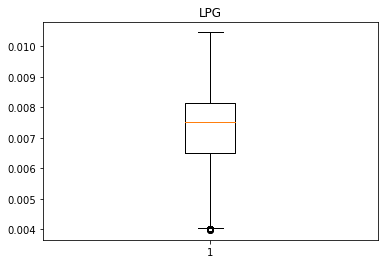

In [23]:
#boxplot of lpg
plt.boxplot(data['lpg'])
plt.title('LPG')

Text(0.5, 1.0, 'smoke')

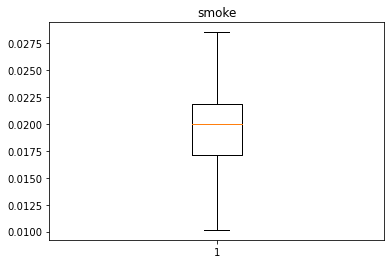

In [24]:
#boxplot of smoke
plt.boxplot(data['smoke'])
plt.title('smoke')

No outliers present in this column

Text(0.5, 1.0, 'Temperature')

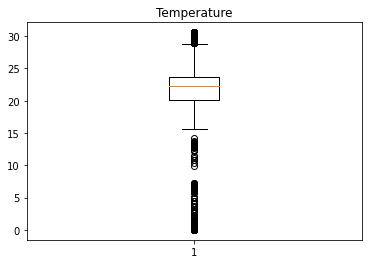

In [25]:
#boxplot of temp
plt.boxplot(data['temp'])
plt.title('Temperature')

In [26]:
# calculating 1st, 2nd and 3rd quartiles
Q1=np.percentile(data['temp'], 25, interpolation='midpoint')
Q2=np.percentile(data['temp'], 50, interpolation='midpoint')
Q3=np.percentile(data['temp'], 75, interpolation='midpoint')
print ("Q1 :", Q1)
print ("Q2 :", Q2)
print ("Q3 :", Q3)

# calculating Lower and Upper limit
IQR= Q3-Q1
Low_lim= Q1-(1.5*IQR)
Up_lim= Q3+(1.5*IQR)
print("Inter Quartile Range : ",IQR)
print("Lower Limit : ",Low_lim)
print("Upper Limit : ",Up_lim)

Q1 : 20.10000038
Q2 : 22.3
Q3 : 23.60000038
Inter Quartile Range :  3.5
Lower Limit :  14.85000038
Upper Limit :  28.85000038


In [27]:
outlier_list3 = []
for x in data['temp']:
        if((x>Up_lim) or (x<Low_lim)):
            outlier_list3.append(x)
            
out=pd.DataFrame(outlier_list3)
out.shape

(11045, 1)

In [28]:
#finding index of outlier
index3=data['temp'][(data['temp']>Up_lim)|(data['temp']<Low_lim)].index

#dropping outlier
data.drop(index3,inplace=True)

Text(0.5, 1.0, 'Temperature')

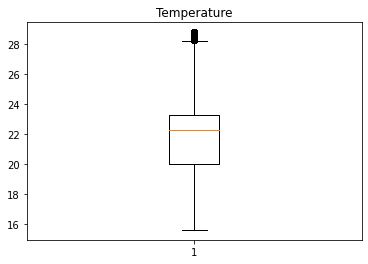

In [29]:
#boxplot of temp
plt.boxplot(data['temp'])
plt.title('Temperature')

### All outliers are handled

## 3. Encoding

In [30]:
data['device'].value_counts()

b8:27:eb:bf:9d:51    186731
00:0f:00:70:91:0a     97900
1c:bf:ce:15:ec:4d     95017
Name: device, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

# label encoding device column
encLab = LabelEncoder()
deviceEnc = pd.DataFrame(encLab.fit_transform(data['device']), columns=['condition'])
deviceEnc.index = data.index

dataEnc = pd.concat([data, deviceEnc], axis=1)
dataEnc.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,Data Stream ID,Resource ID,Measurement ID,Record ID,condition
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,33313,65523,2.519093e+18,333132519093122000000000.00,2
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,33313,65523,2.519093e+18,333132519093122000000000.00,0
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,33313,65523,2.519093e+18,333132519093123000000000.00,2
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,33313,65523,2.519093e+18,333132519093123000000000.00,1
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,33313,65523,2.519093e+18,333132519093124000000000.00,2


In [32]:
# Label Encoding Light column
encLab2 = LabelEncoder()
lightEnc = pd.DataFrame(encLab2.fit_transform(dataEnc['light']), columns=['lights'])
lightEnc.index = dataEnc.index

dataEnc2 = pd.concat([dataEnc, lightEnc], axis=1)
dataEnc2.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,Data Stream ID,Resource ID,Measurement ID,Record ID,condition,lights
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,33313,65523,2.519093e+18,333132519093122000000000.00,2,0
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,33313,65523,2.519093e+18,333132519093122000000000.00,0,0
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,33313,65523,2.519093e+18,333132519093123000000000.00,2,0
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,33313,65523,2.519093e+18,333132519093123000000000.00,1,1
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,33313,65523,2.519093e+18,333132519093124000000000.00,2,0


## 4. Feature reduction

In [33]:
# removing columns
dataProcessed = dataEnc2.drop(['device', 'light', 'ts','motion', 'Data Stream ID', 'Resource ID', 'Measurement ID', 'Record ID' ], axis=1)
dataProcessed.head()

,co,humidity,lpg,smoke,temp,condition,lights
0,0.004956,51.000000,0.007651,0.020411,22.700000,2,0
1,0.002840,76.000000,0.005114,0.013275,19.700001,0,0
2,0.004976,50.900000,0.007673,0.020475,22.600000,2,0
3,0.004403,76.800003,0.007023,0.018628,27.000000,1,1
4,0.004967,50.900000,0.007664,0.020448,22.600000,2,0


### 5. Normalization

In [34]:
#import libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
df=dataProcessed

In [36]:
df.describe()

,co,humidity,lpg,smoke,temp,condition,lights
count,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000
mean,0.004693,60.093119,0.007314,0.019473,22.371141,1.233983,0.267419
std,0.001073,11.292180,0.001238,0.003507,2.404998,0.833653,0.442613
min,0.002008,16.600000,0.003979,0.010153,15.600000,0.000000,0.000000
25%,0.003958,50.900000,0.006502,0.017155,20.000000,0.000000,0.000000
50%,0.004858,54.100000,0.007541,0.020099,22.300000,1.000000,0.000000
75%,0.005455,74.099998,0.008201,0.021983,23.300000,2.000000,1.000000
max,0.007642,92.000000,0.010466,0.028524,28.799999,2.000000,1.000000


In [37]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
df['temp']=min_max.fit_transform(df[['temp']])
df.describe()

,co,humidity,lpg,smoke,temp,condition,lights
count,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000
mean,0.004693,60.093119,0.007314,0.019473,0.512965,1.233983,0.267419
std,0.001073,11.292180,0.001238,0.003507,0.182197,0.833653,0.442613
min,0.002008,16.600000,0.003979,0.010153,0.000000,0.000000,0.000000
25%,0.003958,50.900000,0.006502,0.017155,0.333333,0.000000,0.000000
50%,0.004858,54.100000,0.007541,0.020099,0.507576,1.000000,0.000000
75%,0.005455,74.099998,0.008201,0.021983,0.583333,2.000000,1.000000
max,0.007642,92.000000,0.010466,0.028524,1.000000,2.000000,1.000000


In [38]:
df['humidity']=min_max.fit_transform(df[['humidity']])
df.describe()

,co,humidity,lpg,smoke,temp,condition,lights
count,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000
mean,0.004693,0.576832,0.007314,0.019473,0.512965,1.233983,0.267419
std,0.001073,0.149764,0.001238,0.003507,0.182197,0.833653,0.442613
min,0.002008,0.000000,0.003979,0.010153,0.000000,0.000000,0.000000
25%,0.003958,0.454907,0.006502,0.017155,0.333333,0.000000,0.000000
50%,0.004858,0.497347,0.007541,0.020099,0.507576,1.000000,0.000000
75%,0.005455,0.762599,0.008201,0.021983,0.583333,2.000000,1.000000
max,0.007642,1.000000,0.010466,0.028524,1.000000,2.000000,1.000000


In [39]:
df['smoke']=min_max.fit_transform(df[['smoke']])
df.describe()

,co,humidity,lpg,smoke,temp,condition,lights
count,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000
mean,0.004693,0.576832,0.007314,0.507305,0.512965,1.233983,0.267419
std,0.001073,0.149764,0.001238,0.190894,0.182197,0.833653,0.442613
min,0.002008,0.000000,0.003979,0.000000,0.000000,0.000000,0.000000
25%,0.003958,0.454907,0.006502,0.381140,0.333333,0.000000,0.000000
50%,0.004858,0.497347,0.007541,0.541375,0.507576,1.000000,0.000000
75%,0.005455,0.762599,0.008201,0.643928,0.583333,2.000000,1.000000
max,0.007642,1.000000,0.010466,1.000000,1.000000,2.000000,1.000000


In [40]:
df['lpg']=min_max.fit_transform(df[['lpg']])
df.describe()

,co,humidity,lpg,smoke,temp,condition,lights
count,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000,379648.000000
mean,0.004693,0.576832,0.514048,0.507305,0.512965,1.233983,0.267419
std,0.001073,0.149764,0.190897,0.190894,0.182197,0.833653,0.442613
min,0.002008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003958,0.454907,0.388925,0.381140,0.333333,0.000000,0.000000
50%,0.004858,0.497347,0.549114,0.541375,0.507576,1.000000,0.000000
75%,0.005455,0.762599,0.650838,0.643928,0.583333,2.000000,1.000000
max,0.007642,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:xlabel='condition', ylabel='count'>

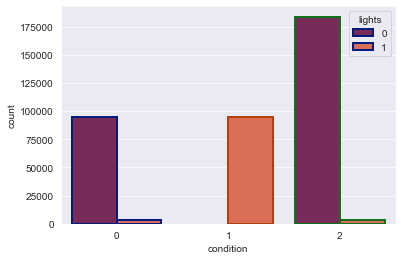

In [41]:
sns.set_style('darkgrid')
sns.countplot('condition', hue='lights',palette="rocket", edgecolor=
              sns.color_palette("dark", 3),linewidth=2, data=df)

<AxesSubplot:xlabel='co', ylabel='humidity'>

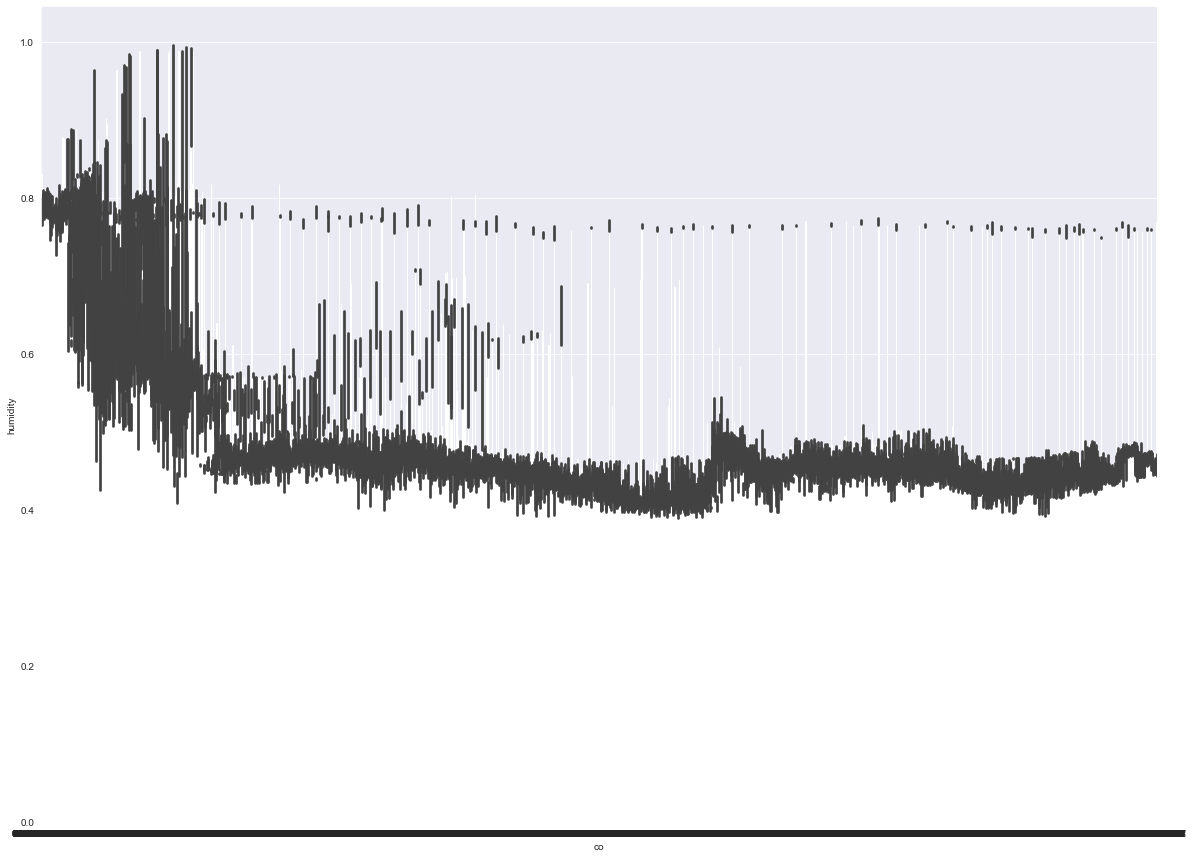

In [42]:
plt.figure(figsize=(20,15))
sns.barplot( 'co','humidity', data= df)

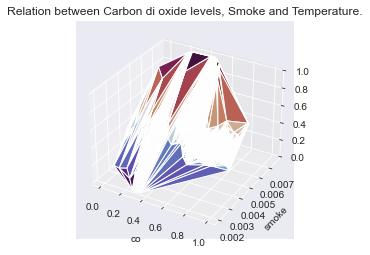

In [43]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['temp'], df['co'], df['smoke'], cmap = plt.cm.twilight_shifted)
plt.title('Relation between Carbon di oxide levels, Smoke and Temperature.')
plt.xlabel('co')
plt.ylabel('smoke')
plt.show()

### 1. Univariate Analysis

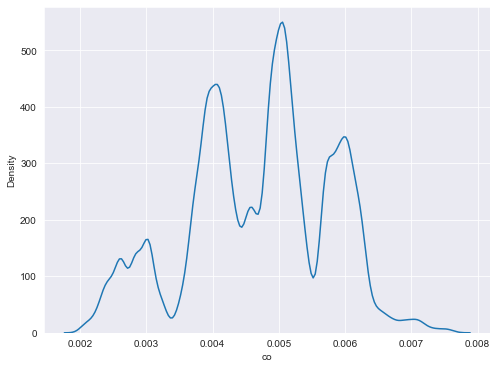

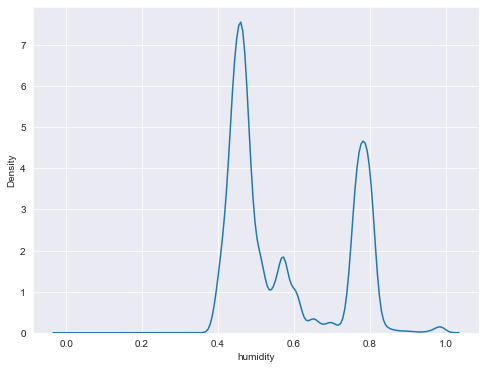

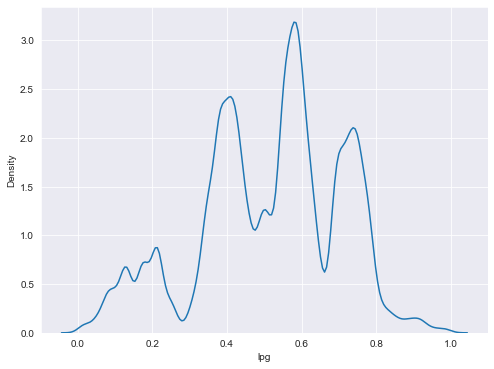

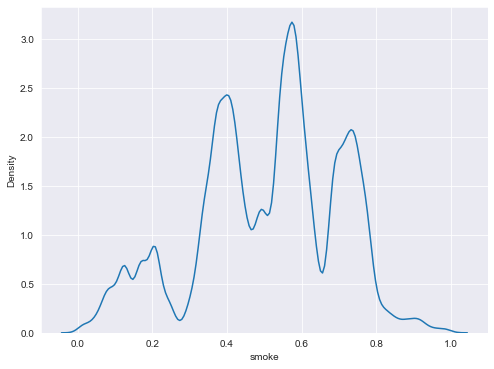

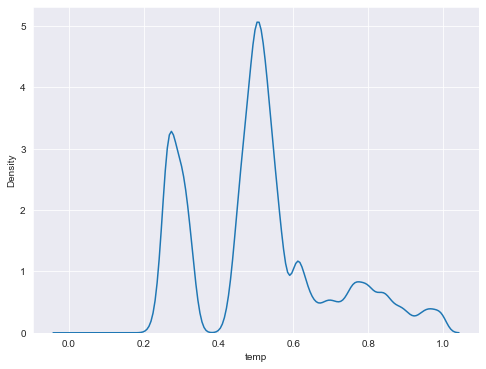

In [44]:
for i in df.columns:
    if df[i].nunique() > 5:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(x=i, data=df)
        plt.show()

In [45]:
def barplot(columnname):
    val = df[columnname]
    valCount = val.value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(valCount.index, valCount)
    plt.title(columnname)
    plt.ylabel('Frequency')
    plt.show()

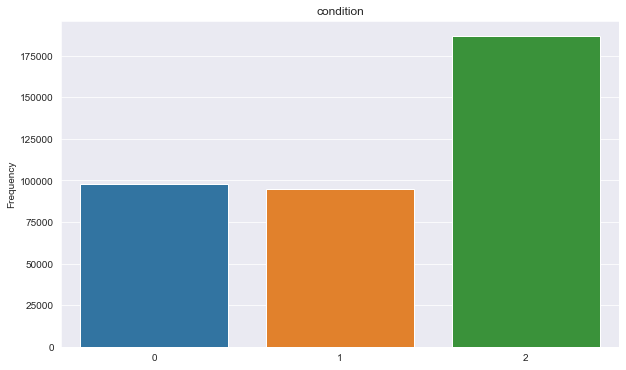

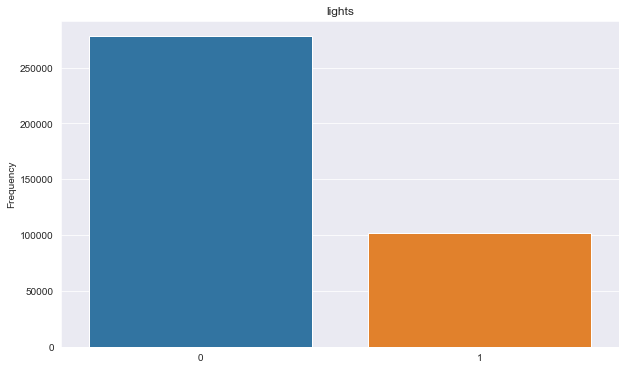

In [46]:
for i in df.columns:
    if df[i].nunique() <= 5:
        barplot(i)

### 2.Bivariate analysis

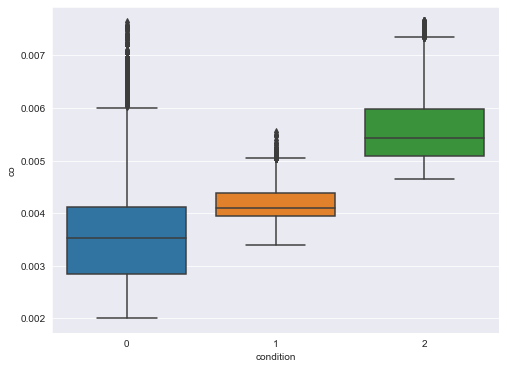

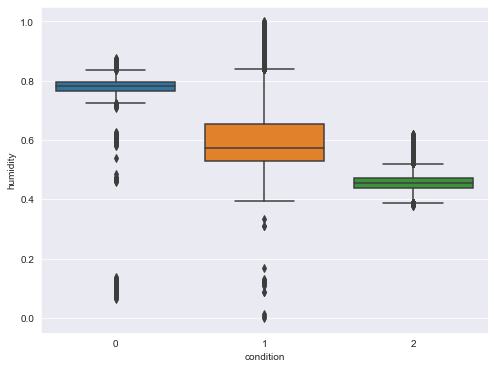

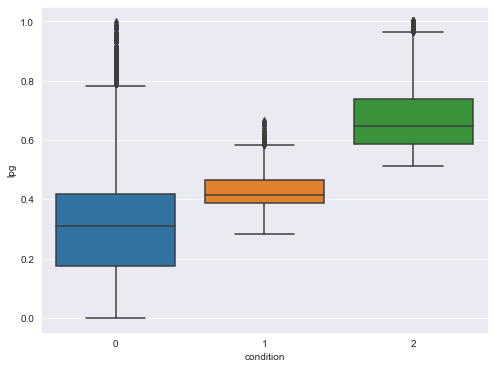

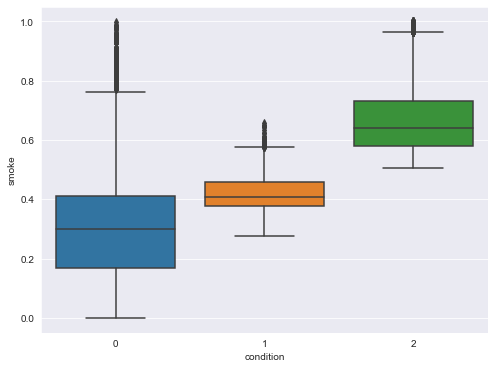

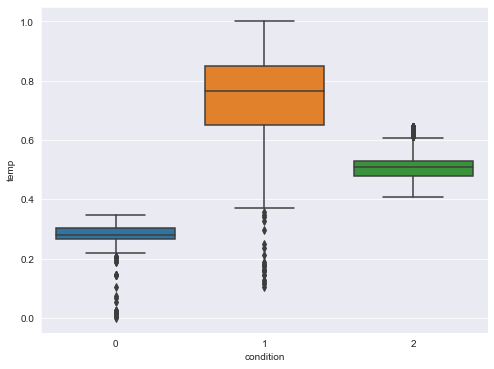

In [47]:
for k in df.columns:
    if df[k].nunique() > 5:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df['condition'], y=df[k])
        plt.show()

<AxesSubplot:>

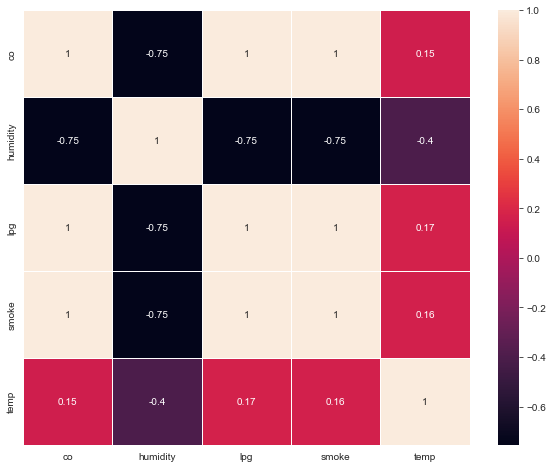

In [48]:
dataCorr = df.drop(['lights', 'condition'], axis=1)
corr = dataCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5)

# Modelling

In [49]:
y = df['condition']
X = df[['temp', 'humidity', 'lights']]

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
#Linear regression
lr= linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions= model.predict(x_test)
print("MSE is : ", mean_squared_error(y_test, predictions))
print('R Squared Value is : ', r2_score(y_test,predictions))

MSE is :  0.11680821933351157
R Squared Value is :  0.8320395397295819


In [52]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(x_train,y_train)
y_pred = logic_model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.9997365994995391
precision_score 0.9997366446804331
f1_score 0.9997365876720637
comfusion matrix:  [[19637     0    12]
 [    6 19048     2]
 [    0     0 37225]]


In [53]:
# decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 1.0
precision_score 1.0
f1_score 1.0
comfusion matrix:  [[19649     0     0]
 [    0 19056     0]
 [    0     0 37225]]


In [54]:
#Support Vector Machine
from sklearn import svm
svmc= svm.SVC()
svmc.fit(x_train,y_train) 
y_pred = svmc.predict(x_test)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.9999078098248386
precision_score 0.9999078343007765
f1_score 0.9999078074769424
comfusion matrix:  [[19649     0     0]
 [    6 19049     1]
 [    0     0 37225]]


In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(x_train,y_train)
y_pred = knnc.predict(x_test)

print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.9999736599499539
precision_score 0.9999736599499539
f1_score 0.9999736599499539
comfusion matrix:  [[19648     1     0]
 [    1 19055     0]
 [    0     0 37225]]


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred,average="weighted"))
print('f1_score',f1_score(y_test,y_pred,average="weighted"))
print('comfusion matrix: ',confusion_matrix(y_test,y_pred))

accuracy_score 0.9999736599499539
precision_score 0.9999736626307386
f1_score 0.9999736599290259
comfusion matrix:  [[19649     0     0]
 [    2 19054     0]
 [    0     0 37225]]


Accuracy score and precisions scores are approximately equal for all modelling

# Model Fine Tuning

## SVM

In [65]:
# Polynomial SVM
svm_poly = svm.SVC(kernel ='poly', degree=3, gamma ='auto')
svm_poly.fit(x_train, y_train)
y_pred = svm_poly.predict(x_test)

In [69]:
from sklearn import metrics
# For testing the goodness of fit of model
# generate evaluation metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19649
           1       1.00      1.00      1.00     19056
           2       1.00      1.00      1.00     37225

    accuracy                           1.00     75930
   macro avg       1.00      1.00      1.00     75930
weighted avg       1.00      1.00      1.00     75930



In [71]:
svm_poly = svm.SVC(kernel ='rbf', decision_function_shape ='ovo', random_state=10, degree=5)
svm_poly.fit(x_train, y_train)
y_pred = svm_poly.predict(x_test)
print("The accuracy score using polynomial svm is ", accuracy_score(y_test,y_pred))

The accuracy score using polynomial svm is  0.9999078098248386


In [72]:
# Radial SVM
svm_radial = svm.SVC(kernel ='rbf')
svm_radial.fit(x_train, y_train)
y_pred = svm_radial.predict(x_test)
print("The accuracy score using radial svm is ", accuracy_score(y_test,y_pred))

The accuracy score using radial svm is  0.9999078098248386


## Random Forest

In [74]:
rft = RandomForestClassifier(n_estimators = 100, max_depth=15, random_state=0, criterion = "entropy")
rft.fit(x_train, y_train)
y_pred = rft.predict(x_test)
print("The accuracy score using modified  random forest classifier is ", accuracy_score(y_test,y_pred))

The accuracy score using modified  random forest classifier is  0.9999736599499539


Differences is negligible between fine tuned models and ordinary models